<a href="https://colab.research.google.com/github/Ssevinc/assistive-vision-ai/blob/main/train/train_yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv8 Training on Custom Assistive Vision Dataset

This notebook trains a YOLOv8 object detection model on a custom dataset of street signs, traffic lights, crosswalks, and other safety-related objects to assist visually impaired individuals. The dataset was created using [Roboflow](https://roboflow.com) and exported in YOLOv8 format.


## 1. Install Dependencies
We install:
- `ultralytics` → YOLOv8 training framework
- `roboflow` → to download the annotated dataset directly from Roboflow


In [1]:
!pip install roboflow ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 86.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 M

## 2. Download Dataset
We use Roboflow's API to download the dataset in YOLOv8 format.

The dataset contains the following classes:
1. bus_stop
2. crosswalk_sign
3. downstair_sign
4. no_entry
5. restroom
6. slippery_sign
7. stairs
8. stop
9. upstair_sign


In [3]:
from roboflow import Roboflow

# Enter your Roboflow API key here
rf = Roboflow(api_key=input("Enter your Roboflow API key: "))

project = rf.workspace("seyyide").project("dataset-z6sm4")
dataset = project.version(3).download("yolov8") #make sure to download the third (final) version.

Enter your Roboflow API key: f8IQQJb6p0Wl8437jxAL
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to dataset-3 in yolov8:: 100%|██████████| 6376/6376 [00:01<00:00, 4346.70it/s]


## 3. Verify GPU Availability
YOLOv8 training on a CPU is slow. We check if Colab is using an NVIDIA GPU (Tesla T4 in this case) to ensure faster training.
(Make sure to change the runtime type to T4 GPU)

In [4]:
!nvidia-smi

Mon Aug 18 14:12:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## 4. Train YOLOv8 Model
We use transfer learning from `yolov8n.pt` (nano model) to train on our dataset for 80 epochs.
- `imgsz=640` → resize images for speed & accuracy balance
- `epochs=80` → chosen to avoid overfitting (tested and observed in Roboflow experiments)
- `data.yaml` → dataset configuration file from Roboflow


In [5]:
!yolo detect train model=yolov8n.pt data=/content/dataset-3/data.yaml epochs=80 imgsz=640

Ultralytics 8.3.180 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset-3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=80, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained


## Model Performance

The YOLOv8 Nano (`yolov8n.pt`) model was trained on our custom assistive vision dataset for **80 epochs** with an image size of **640×640**. The best model checkpoint (`best.pt`) achieved the following performance on the validation set:

| Class               | Precision (P) | Recall (R) | mAP50 | mAP50-95 |
| ------------------- | ------------: | ---------: | ----: | -------: |
| **Crosswalk**       |         0.968 |      0.985 | 0.986 |    0.850 |
| **bus\_stop**       |         0.974 |      1.000 | 0.995 |    0.962 |
| **crosswalk\_sign** |         1.000 |      0.989 | 0.995 |    0.929 |
| **downstair\_sign** |         1.000 |      0.527 | 0.795 |    0.330 |
| **green\_light**    |         0.736 |      0.750 | 0.814 |    0.396 |
| **no\_entry**       |         0.980 |      1.000 | 0.995 |    0.985 |
| **red\_light**      |         0.909 |      0.884 | 0.932 |    0.430 |
| **restroom**        |         0.978 |      1.000 | 0.995 |    0.959 |
| **slippery\_sign**  |         0.937 |      0.957 | 0.961 |    0.949 |
| **stairs**          |         0.975 |      1.000 | 0.995 |    0.961 |
| **stop\_sign**      |         0.927 |      1.000 | 0.984 |    0.978 |
| **upstair\_sign**   |         0.682 |      0.333 | 0.507 |    0.174 |
| **yellow\_light**   |         0.662 |      1.000 | 0.828 |    0.417 |

**Overall Performance:**

* **mAP50:** 0.906
* **mAP50-95:** 0.717

---

###Insights

* **Strong classes:** `crosswalk`, `crosswalk_sign`, `bus_stop`, `stop_sign`, `restroom`, and `stairs` achieve near-perfect precision and recall.
* **Moderate classes:** `green_light`, `red_light`, and `slippery_sign` perform reasonably well but could benefit from additional samples and augmentation.
* **Weak classes:** `downstair_sign`, `upstair_sign`, and `yellow_light` have low recall and mAP, indicating the model struggles to generalize. Likely due to limited training data and high variability.

### Next Steps for Improvement

* **Data:** Collect more samples for weak classes (especially `upstair_sign` and `yellow_light`).
* **Augmentation:** Apply rotations, brightness shifts, and perspective transformations to increase variety.
* **Training:** Consider fine-tuning with class-balanced sampling or using a slightly larger model variant (YOLOv8s).

---

**Trained Weights:** [`best.pt`](models/best.pt)



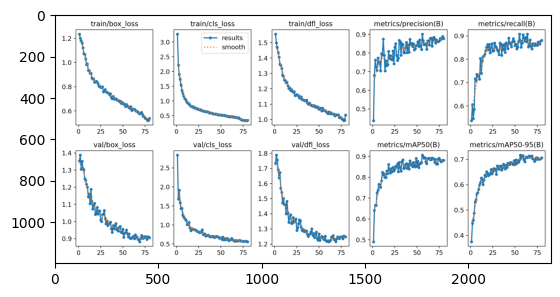

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('/content/runs/detect/train/results.png'))

This cell is to download the trained weights from Colab so they can be moved into the models/ folder in the GitHub repo.

In [16]:
# @title Download the model
from google.colab import files

files.download('/content/runs/detect/train/weights/best.pt')
files.download('/content/runs/detect/train/weights/last.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>